# Descripción del proyecto

## Contexto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Model Fitness te aportó un archivo CSV (gym_churn_us.csv) que contiene los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía.

## Objetivos del proyecto

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
    - identificar a los grupos objetivo;
    - sugerir medidas para reducir la rotación;
    - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Datos del archivo gym_churn_us,csv

Campos de dataset actuales:
- 'Churn' — la cancelación para el mes en cuestión

Datos del usuario del mes anterior
- 'gender'.
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'.
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## Etapa 1. Definir la tarea y los datos que voy a utilizar

La tarea en cuestión es analizar los datos que me proporciona Model Fitness en el dataset 'gym_churn_us_csv' y elaborar una estrategia de retención de clientes, siguiendo los objetivos planteados anteriormente.

## Etapa 2. Obtener los datos

Ya los he descargado, ahora los importo a esta hoja de trabajo:

In [ ]:
# Celda de librerias generales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
gym = pd.read_csv('dataset/gym_churn_us.csv')

## Etapa 3. Hacer análisis exploratorio de datos (EDA) 

### Actividades
- 3.1 Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
- 3.2 Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que - se quedaron (utiliza el método groupby()).
- 3.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- 3.4 Crea una matriz de correlación y muéstrala.

### 3.1 Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [3]:
print(gym.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
print(gym.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

### Nota:
En la clumna 'churn':
- 0 == Clientes que siguen activos.
- 1 == Clientes que han cancelado su membresía.

In [5]:
# Cambio de la característica 'Month_to_end_contract' a número entro
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype("int64")

# Poner todas las características en minísculas
gym.columns = gym.columns.str.lower()


In [6]:
print(gym.head())

   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                      5   
1             1   31                    113.202938                     12   
2             0   28                    129.448479                      1   
3             1   33                     62.669863                     12   
4             0   26                    198.362265                      1   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0  

### 3.1 Conclusiones:

1. Tenemos un dataset con 13 características y 4,000 entradas.
2. Son 7 características de datos binarios, 3 características de datos numéricos enteros ("month_to_end_contract" la cambiamos para que sea entero también) y 3 características que son promedios en numérico decimal.
3. No tenemos valores ausentes en las características.
4. Los valores promedio de las características nos dicen:
    - El 26% de los clientes han abandonado el gimnasio.
    - El 84% de los clientes viven o trabaja cerca del gimnasio.
    - El 48% de los clientes se inscribió con una empresa afiliada.
    - El promedio de la edad de las personas que se han inscrito en el gymnasio es de 29 años.
    - El promedio de tiempo de los contratos realizados es de 4.6 meses.
    - El promedio de visitas por cliente por semana es de 1.8.
    - (Sin saber las fechas de los datos del dataseet podría concluir que el gimnasio tiene solo unos pocos meses que abrío o los datos son solo de un cierto periodo, sin embargo, se debería realizar un análisis más profundo para saberlo con certeza, pero saber eso no es el tema de este proyecto)
5. En todas las característica a exepción de "avg_additional_charges_total" la desviación estandar es pequeña por lo que podemos decir que los datos varian poco, el promedio es confiable y hay consistencia en los valores.

### 3.2 Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby())

In [7]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### 3.2 Conclusiones:

Tomando tres características que pueden ser relevantes:
- El promedio de la edad de las personas que se fueron es de 27 años en comparación de los clientes que todavía están con promedio de 30 año.
- El promedio de las personas que se fueron del gimnasio realizan en promedio menos gastos extras $115, en comparación de los clientes que están gastan en promedio $158
- El promedio del tiempo de la membresia que tenian las personas que se fueron es de casi 2 meses, y el de los clientes que todavía están es un promedio de tiempo de membresia de casi 6 meses. 

### 3.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron

In [8]:
print("Comparación por grupos:")
print(gym.groupby('churn')[['age', 'avg_additional_charges_total', 'contract_period']].mean())

Comparación por grupos:
             age  avg_additional_charges_total  contract_period
churn                                                          
0      29.976523                    158.445715         5.747193
1      26.989632                    115.082899         1.728558


In [9]:
# Separo por grupo de clientes que se han ido y los que han permanecido
churn_0 = gym[gym['churn'] == 0]
churn_1 = gym[gym['churn'] == 1]

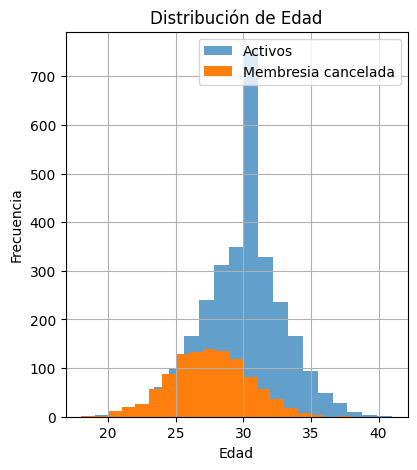

In [10]:
# Edad
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
churn_0['age'].hist(alpha=0.7, label='Activos', bins=20)
churn_1['age'].hist(label='Membresia cancelada', bins=20)
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
plt.title('Distribución de Edad')
plt.legend()

### 3.3 Conclusiones de Edad entre clientes que se fueron (1) y clientes activos (0):
- Tenemos un histograma con una distribución normal.
- En proporciones visuales vemos que el rango de edades de los clientes que más han cancelado su membresía es de entre los 25 y 30 años.
- El rango de edades entre los clientes activos es entre los 28 y 32 años aproximadamente.
- Más de 700 clientes activos se encuntran en los 31 años.

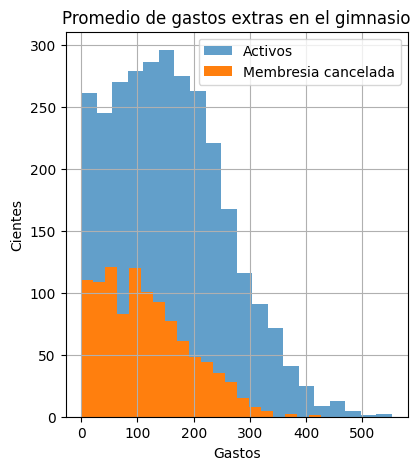

In [11]:
# Promedio de gastos extras en el gimnasio
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
churn_0['avg_additional_charges_total'].hist(alpha=0.7, label='Activos', bins=20)
churn_1['avg_additional_charges_total'].hist(label='Membresia cancelada', bins=20)
plt.title('Promedio de gastos extras en el gimnasio')
plt.ylabel('Cientes')
plt.xlabel('Gastos')
plt.legend()

### 3.3 Conclusiones para clientes que hacen gastos extras en el gimnasio entre clientes que se fueron (1) y clientes que se quedaron (0):
- Tenemos dos histogramas con sesgo a la derecha
- Hay muchas similitudes en los gastos extras realizados por mes, no encuentro alguna diferencia realmente notable.
- Dentro de los clientes activos hay un pequeño grupo de personas que han realizado en gastos realmente altos, pero estos son excepcionales.

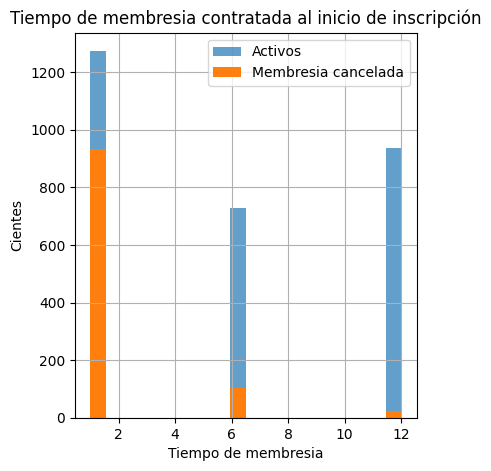

In [12]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
churn_0['contract_period'].hist(alpha=0.7, label='Activos', bins=20)
churn_1['contract_period'].hist(label='Membresia cancelada', bins=20)
plt.title('Tiempo de membresia contratada al inicio de inscripción')
plt.ylabel('Cientes')
plt.xlabel('Tiempo de membresia')
plt.legend()

### 3.3 Conclusiones de tiempo de membresía contratada al momento de inscripción entre clientes que se fueron (1) y clientes que se quedaron (0):
Podemos observar que los clientes con menos compromiso realizan la contratación de solo 1 mes, y son membresias ya canceladas, para 6 y 12 meses es mucho menor la cantidad de clientes con membresias canceladas, esto nos puede decir que el compromiso por quedarse es desde el inicio.

### 3.4 Crea una matriz de correlación y muéstrala

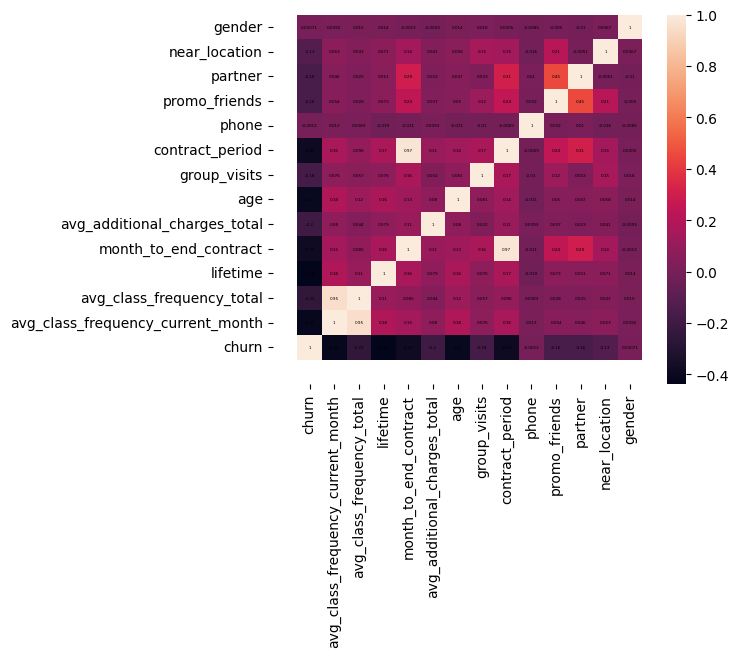

In [13]:
matriz_corr = gym.corr()
fig, ax = plt.subplots()

# La mostramos con un mapa de calor
sns.heatmap(matriz_corr, annot = True, square=True, annot_kws={"size": 3, "color": "black"})
ax.set_ylim(15, 0)
ax.set_xlim(15, 0) 
plt.show()

### 3.4 Conclusiones
- Locación cerca, pertenecer a una empresa afilidad, llegar con una promo de algún conocido, participar en clases grupales, gastar más dinero en el gimnasio y visitar más días el gimnasio tienen una correlación alta y hacen que la probabilidad de que siga activo sea considerable para un punto de mayor análisis, sin embargo;
- el periodo de tiempo que se haya contratado en el inicio de la membresía del gimnasio, la edad, el tiempo que se lleva en el gimnasio y el tiempo que falta para que se venza la membresía son características altamente correlacionadas, la probabilidad de que sigas activo y no canceles la membresía tiene mayor impacto en estas 4 características.

## Etapa 4. Construir un modelo para predecir la cancelación de usuarios

### Actividades:
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- 4.1  Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- 4.2  Entrena el modelo en el set de entrenamiento con dos métodos:
    - regresión logística;
    - bosque aleatorio.
- 4.3  Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

### 4.1  Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X = gym[['contract_period', 'age', 'lifetime']]
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4.2  Entrena el modelo en el set de entrenamiento con dos métodos

### 4.2.1 Regresión logística:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

predictions = model_1.predict(X_test)
probabilities = model_1.predict_proba(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del modelo: {accuracy:.3f}")

# Reporte detallado
print(classification_report(y_test, predictions))


Precisión del modelo: 0.907
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       602
           1       0.82      0.80      0.81       198

    accuracy                           0.91       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.91      0.91      0.91       800



c:\Users\K9U\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.2.1 Conclusiones de Regresión logísitca:

Hay un desvalance moderado, con 602 muestras para clientes que se quedan (75.25%) y 198 clientes que se van (24.75%) nos da una proporción aproximada de 3:1. Sin embargo, esto afecta el modelo ya el objetivo del gimnasio es identificar a los clientes que se van a ir y este modelo es mejor identificando a los clientes que se van a quedar.
Si el modelo falla con falsos negativos (El cliente se va pero el modelo dice que se queda) el gimnasio pierde al cliente sin intentar retenerlo y si falla con falsos positivos (El cliente se queda pero el modelo dice que se va) se gasta dinero para intentar retenerlo cuando no se iba a ir.
Aunque nos fijemos en el métrica Recall que nos da un 78% de acertividad al identificar los clientes que se van, un 22% sigue siendo mucho para dejar pasar. Vamos a ver que nos resulta con Random Forest.

### 4.2.2 Bosque aleatorio

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = gym.drop('churn', axis=1)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_2.fit(X_train, y_train)
rf_predictions = model_2.predict(X_test)

print("=== RANDOM FOREST RESULTS ===")
print(classification_report(y_test, rf_predictions))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, rf_predictions))

=== RANDOM FOREST RESULTS ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       602
           1       0.84      0.82      0.83       198

    accuracy                           0.92       800
   macro avg       0.89      0.88      0.89       800
weighted avg       0.92      0.92      0.92       800


Matriz de confusión:
[[571  31]
 [ 36 162]]


In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.895


### 4.2.2 Conclusiones con bosque aleatorio
Tuve que usar todas las características para poder aumentar los resultados de las métricas, en lugar de solo 3 como en la regresión logística, y obtuvimos que:
- Aumentamos el recall a un 82%, no pierde tantos clientes ya que predice la mayoría de ellos cuando se van a ir.
- No tuvimos trade-off con precision y subió al 84%, esto nos hace el modelo eficiente porque nos reduce el desperdicio de recuersos en clientes que no se van a ir. 
- Con Accuracy del 0.89 nos dice que clasifica correctamente al 89% de todos los clientes, por ende, es confiable.

### 4.3  Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

En las conclusiones anteriores hice las evaluaciones de la exactitud, precisión y recall, concluyendo que el mejor modelo es el de Bosque Aleatorio, aunque probablemente la mejora notable se deba a que utilicé todas las características en este modelo y en el de Regresión Logística solo utilicé tres.

## Etapa 5. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

- 5.1  Estandariza los datos.
- 5.2  Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
- 5.3  Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
- 5.4  Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
- 5.5  Traza distribuciones de características para los clústeres. ¿Notas algo?
- 5.6  Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

### 5.1  Estandariza los datos

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
x_sc = sc.fit_transform(gym)

### 5.2  Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma

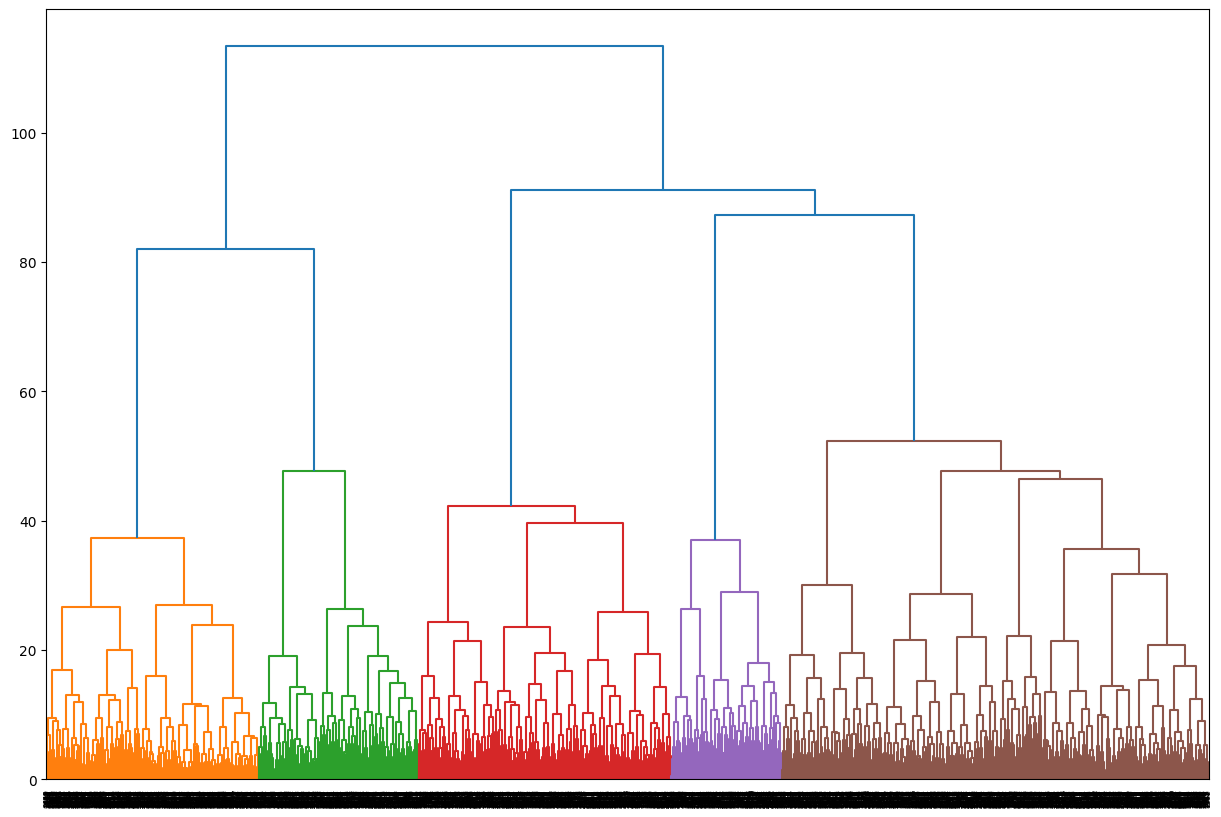

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

### 5.2 Conclusiones:
El número óptimo de clusters sugeridos es 5, por los cinco colores diferentes del gráfico.

### 5.3  Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes

In [42]:
km = KMeans(n_clusters= 5)

labels = km.fit_predict(x_sc)

gym['cluster_km'] = labels

print(gym['cluster_km'])

0       1
1       0
2       3
3       0
4       2
       ..
3995    0
3996    4
3997    0
3998    2
3999    1
Name: cluster_km, Length: 4000, dtype: int32


### 5.3 Conclusiones:
Podemos observar que todos los clientes ya se han asignado a un cluster del 0 al 4.

### 5.4  Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [43]:
gym.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.492537,0.936228,0.772049,0.545455,0.990502,10.440977,0.529172,29.962008,160.136407,9.462687,4.814111,2.770523,2.767344,0.009498
1,0.533156,0.862069,0.464191,0.294430,0.000000,4.633952,0.421751,29.257294,142.493263,4.334218,3.915119,1.835278,1.700896,0.270557
2,0.518732,0.902017,0.720461,0.489914,0.998559,8.038905,0.521614,29.717579,161.189563,7.381844,4.511527,0.924801,0.918076,0.020173
3,0.512571,0.821573,0.308191,0.172749,1.000000,1.828062,0.404704,30.181671,157.524923,1.748581,4.676399,2.248571,2.251992,0.006488
4,0.505735,0.758081,0.336809,0.175182,0.998957,1.511992,0.249218,26.889468,114.640909,1.464025,1.019812,1.426490,1.015210,0.969760


### 5.4 Conclusiones:
Me llama mucho la atención que en el cluster 4 un 96% casi 97% de clientes cancelaron su membresía. Las características notables de este cluster son que la edad promedio es la menor de todas las demas con 26.8 y también el menor tiempo en el gimnasio.  

### 5.5  Traza distribuciones de características para los clústeres. ¿Notas algo?

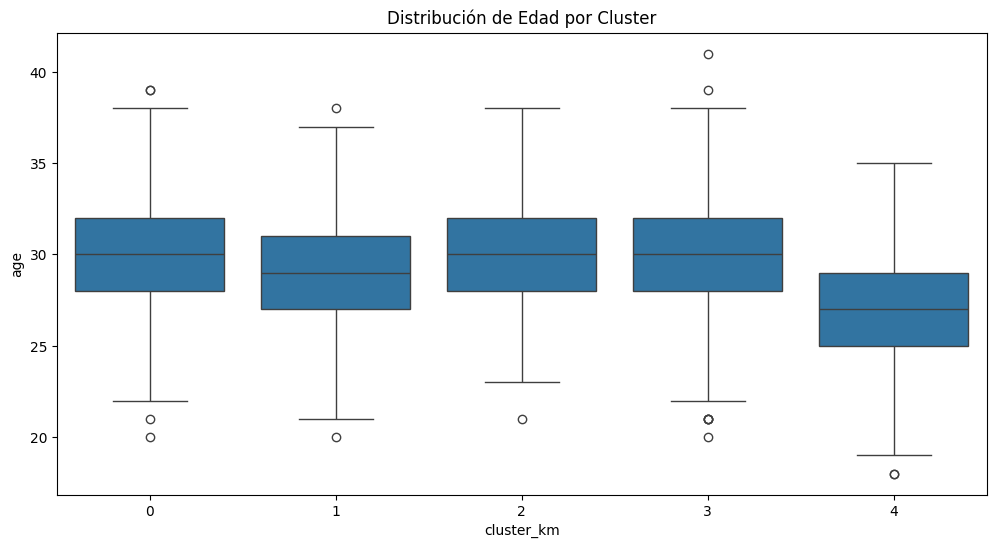

In [44]:
# Edad
plt.figure(figsize=(12, 6))

sns.boxplot(data=gym, x='cluster_km', y='age')
plt.title('Distribución de Edad por Cluster')
plt.show()

### Conclusiones de edad:
La edad en cluster 5 es la menor de todos los demás clusters.

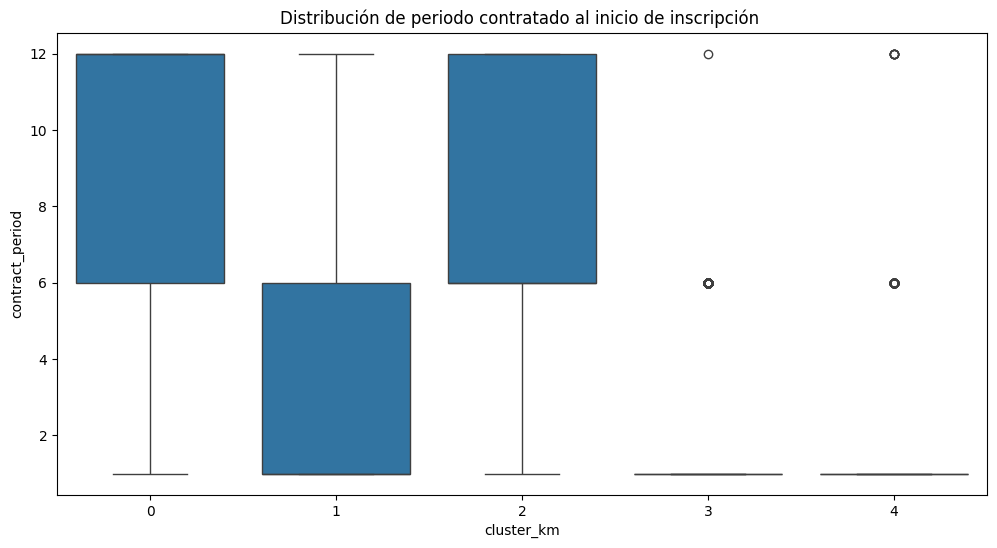

In [47]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=gym, x='cluster_km', y='contract_period')
plt.title('Distribución de periodo contratado al inicio de inscripción ')
plt.show()

### Conclusiones en membresía contratada al inicio
En el cluster 4 y el de nuestro interés el 5 es 1 o menos 1 el periodo de contratación de la membresía.

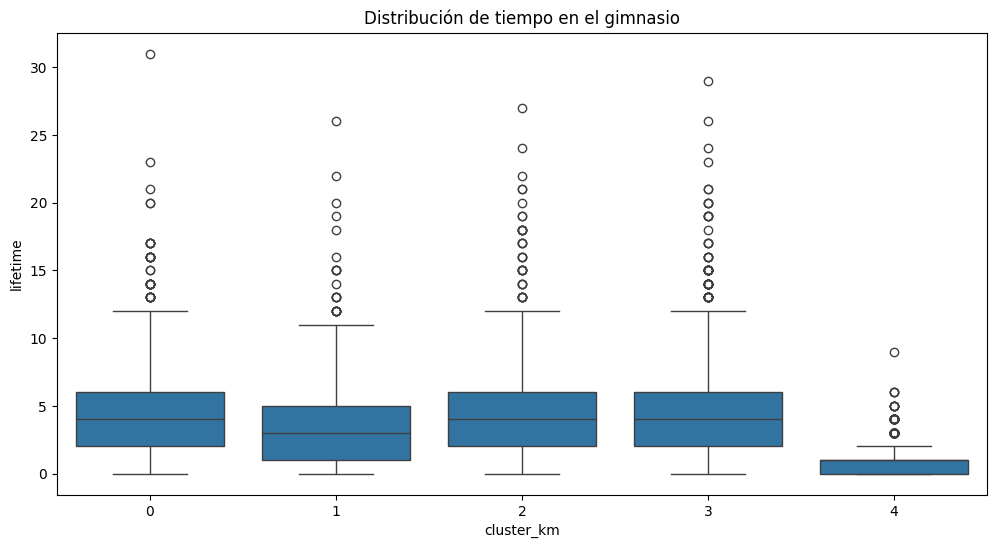

In [48]:
# Tiempo en el gimnasio

plt.figure(figsize=(12, 6))

sns.boxplot(data=gym, x='cluster_km', y='lifetime')
plt.title('Distribución de tiempo en el gimnasio')
plt.show()

### Conclusión de tiempo que llevan en el gimnasio:
En el cluster 5 el tiempo que llevan en el gimnasio no supera los 2 meses a excepción de los datos extrabagantes.

### 5.6  Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

cluster_km
0    0.009498
1    0.270557
2    0.020173
3    0.006488
4    0.969760
Name: churn, dtype: float64


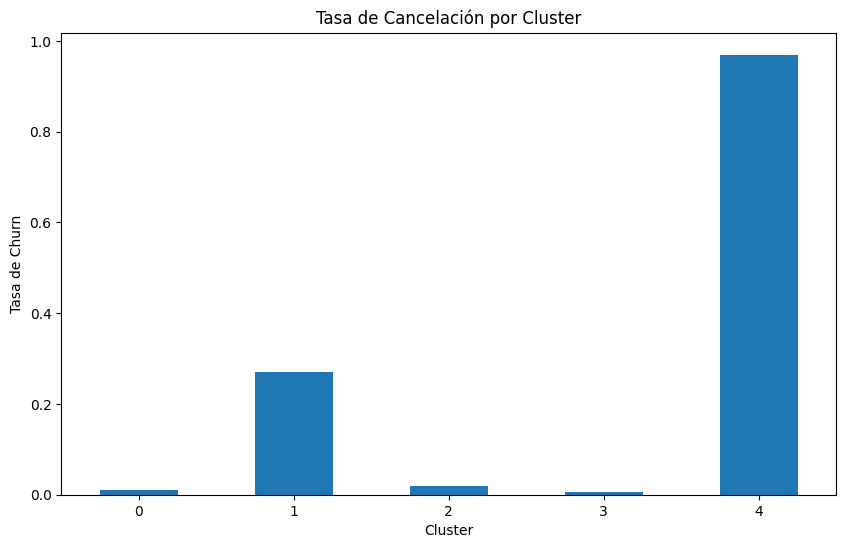

In [57]:
churn_rate_by_cluster = gym.groupby('cluster_km')['churn'].mean()
print(churn_rate_by_cluster)

plt.figure(figsize=(10, 6))
churn_rate_by_cluster.plot(kind='bar')
plt.title('Tasa de Cancelación por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=0)
plt.show()

### 5.6 Conclusión:
Difieren mucho en términos de tasa de cancelación entre clusters, siendo el grupo 4 el más propenso para irse como lo vimos al mirar los valores medios de las características y también agregamos que los grupos más leales son el 0, 2 y 3.

## Etapa 6. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.